<a href="https://colab.research.google.com/github/ayberkcorp/cap4630-artificial_intelligence/blob/master/HW_3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

### Implement required functions:

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Generates random data for logistic regression with two features
def get_random_data(w, b, mu, sigma, m):
  data = np.empty((m, 2))
  labels = np.empty((m, 1))

  for i in range(m):
    c = np.random.randint(0, 2)
    x_1 = np.random.uniform()
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + (-1) ** c * n

    labels[i] = c
    data[i][0] = x_1
    data[i][1] = x_2

  return data, labels

# Displays data generated by get_random_data()
def display_random_data(data, labels):
  fig = plt.figure()
  for i in range(data.shape[0]):
    plt.scatter(data[i][0], data[i][1],
                c='red' if labels[i] else 'blue')

### Experimentation:

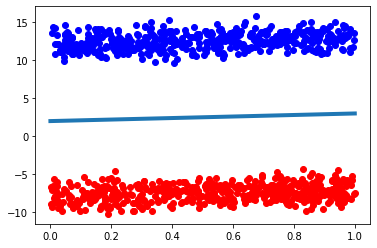

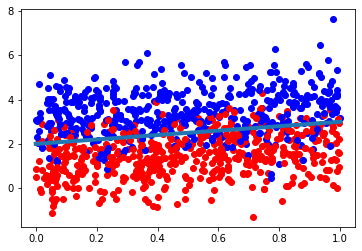

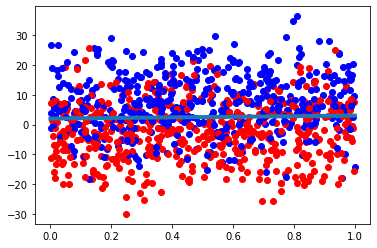

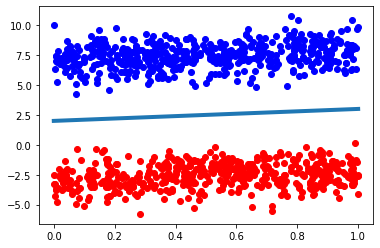

In [60]:
# Trial 1: mu = 10, sigma = 1
data, labels = get_random_data(1, 2, 10, 1, 1000)
display_random_data(data, labels)
plt.plot([0, 1], [2, 3], linewidth=4.0)

# Trial 2: mu = 1, sigma = 1
data, labels = get_random_data(1, 2, 1, 1, 1000)
display_random_data(data, labels)
plt.plot([0, 1], [2, 3], linewidth=4.0)

# Trial 3: mu = 5, sigma = 10
data, labels = get_random_data(1, 2, 5, 10, 1000)
display_random_data(data, labels)
plt.plot([0, 1], [2, 3], linewidth=4.0)

# Trial 4: mu = 5, sigma = 1
data, labels = get_random_data(1, 2, 5, 1, 1000)
display_random_data(data, labels)
plt.plot([0, 1], [2, 3], linewidth=4.0);

### Split data:

Split the data and labels from trial 4 into a training set (80%) and a test set (20%).

In [0]:
split_index = int(0.8 * data.shape[0])
training_data = data[:split_index]
training_labels = labels[:split_index]
test_data = data[split_index:]
test_labels = labels[split_index:]

# Problem 2

### Implement Logistic Regression:

Here, we use stochastic gradient descent (SGD) and binary cross entropy loss.

In [62]:
%tensorflow_version 2.x
import tensorflow as tf

# Build and compile model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Train model
history = model.fit(training_data,
                    training_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(test_data, test_labels))

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 3.4050 - accuracy: 0.0000e+00 - val_loss: 3.3014 - val_accuracy: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 3.1994 - accuracy: 0.0000e+00 - val_loss: 3.1042 - val_accuracy: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 3.0061 - accuracy: 0.0000e+00 - val_loss: 2.9115 - val_accuracy: 0.0000e+00
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 2.8112 - accuracy: 0.0000e+00 - val_loss: 2.7167 - val_accuracy: 0.0000e+00
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 2.6224 - accuracy: 0.0000e+00 - val_loss: 2.5289 - val_accuracy: 0.0000e+00
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 2.4349 - accuracy: 0.0000e+00 - val_loss: 2.3421 - val_accuracy: 0.0000e+00
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 2.2505 - accuracy: 0.0000e+00 - v

### Obtain the separating line:

To find our separating line, we need to first find $w_1$, $w_2$, and $b_{model}$ for our trained model.  

Once we know these values, then we can find our predicted weight $w_p$ and predicted bias $b_p$ for the separating line like so:

$w_1 x_1 + w_2 x_2 + b_{model} = 0 \implies x_2 = -\left(\frac{w_1}{w_2} \right) x_1 - \left(\frac{b_{model}}{w_2} \right) \implies w_p = -\left(\frac{w_1}{w_2} \right), \space b_p = -\left(\frac{b_{model}}{w_2} \right)$.

In [0]:
weights = model.get_weights()

w_1 = weights[0][0][0]
w_2 = weights[0][1][0]
b_model = weights[1][0]

w_p = -(w_1 / w_2)
b_p = -(b_model / w_2)

### Plot results:

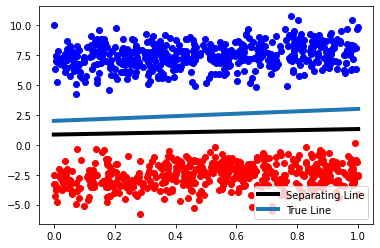

In [64]:
# Regular scatter plot with true and separating lines
display_random_data(data, labels)
x = np.linspace(0, 1, 100)
y_p = w_p * x + b_p
plt.plot(x, y_p, 'black', label='Separating Line', linewidth=4.0)
plt.plot([0, 1], [2, 3], label='True Line', linewidth=4.0)
plt.legend(loc='lower right');

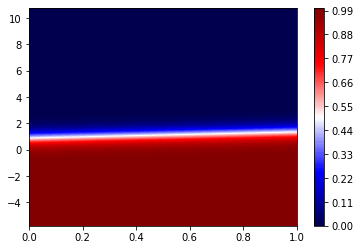

In [65]:
# Heatmap of model's output

def sigma(z):
  return 1 / (1 + np.exp(-z))

def f1(x, y):
  return sigma(weights[0][0] * x + weights[0][1] * y + weights[1])

x_min, x_max = 0, 1
y_min, y_max = min(data[:, 1]), max(data[:, 1])

x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)

X, Y = np.meshgrid(x, y)
Z = f1(X, Y)

plt.contourf(X, Y, Z, 100, cmap='seismic')
plt.colorbar();

# Problem 3

### Implement binary cross-entropy loss functions:

In [0]:
# Returns the binary cross-entropy loss
def bCEL(a, y):
  return (-1 * y * np.log(a)) - (1 - y) * np.log(1 - a)

# Returns the partial derivative of bCEL with respect to wj
def pd_wj_bCEL(a, y, x_j):
  return (a - y) * x_j

# Returns the partial derivative of bCEL with respect to b
def pd_b_bCEL(a, y):
  return (a - y)

### Build and train the model:

In [0]:
m = 800
w1 = 1
w2 = 2
b = 3
lr = 0.01
epochs = 40
loss = [0] * epochs
acc = [0] * epochs

for i in range(epochs):
  for j in range(m):
    z = w1 * data[j][0] + w2 * data[j][1] + b
    a = sigma(z)
    prediction = a
    loss[i] += bCEL(a, labels[j])
    prediction = 1 if (prediction > 0.5) else 0
    if(prediction == labels[j]):
      acc[i] += 1
    w1 -= lr * pd_wj_bCEL(a, labels[j], data[j][0])
    w2 -= lr * pd_wj_bCEL(a, labels[j], data[j][1])
    b -= lr * pd_b_bCEL(a, labels[j])
  
  loss[i] = loss[i] / m
  acc[i] = acc[i] / m

### Display results:

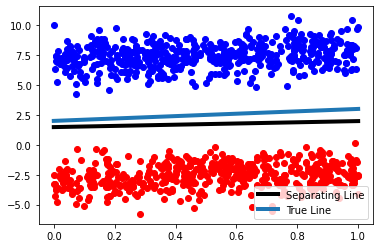

In [68]:
# Regular scatter plot with true and separating lines
display_random_data(data, labels)
x = [0] * 2
y = [0] * 2
x[0] = 0
x[1] = 1
y = (-(w1 * x) - b) / w2
plt.plot(x, y, 'black', label='Separating Line', linewidth=4.0)
plt.plot([0, 1], [2, 3], label='True Line', linewidth=4.0)
plt.legend(loc='lower right');

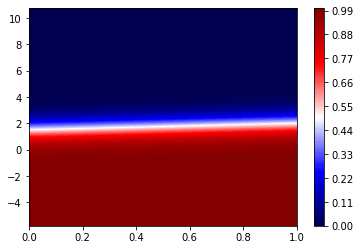

In [69]:
# Heatmap of model's output

def f2(x, y):
  return sigma(w1 * x + w2 * y + b)

x_min, x_max = 0, 1
y_min, y_max = min(data[:, 1]), max(data[:, 1])

x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)

X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

plt.contourf(X, Y, Z, 100, cmap='seismic')
plt.colorbar();

### Binary cross-entropy loss and accuracy on the test set:

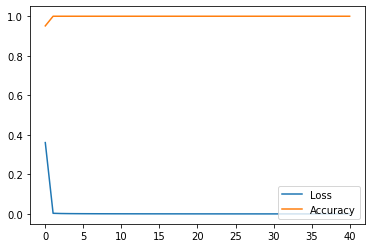

In [70]:
plt.figure()
e = np.linspace(0, epochs, 40)
plt.plot(e, loss, label='Loss')
plt.plot(e, acc, label='Accuracy');
plt.legend(loc='lower right');

# Sources

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

https://colab.research.google.com/drive/1hUc_4HTtPQ2Xq0XXnokV4uoK84zmmvQR

https://colab.research.google.com/drive/1pcvtvK6jITbp1Sf2nD2uEaDGpwUOA3IL